## Load parquet

In [1]:
import logging
import pandas as pd

import matplotlib.pyplot as plt
import pandas_ta as ta

In [2]:
df = pd.read_parquet("3_years_500_stocks.parquet")

In [3]:
df.head()

,instrument_id,ts,open_price,close_price,high_price,low_price,volume
0,1,2018-01-23 21:45:00+00:00,114.02,114.02,114.02,114.02,6.0
1,1,2018-01-23 21:35:00+00:00,114.02,114.02,114.02,114.02,10.0
2,1,2018-01-23 20:55:00+00:00,114.20,114.23,114.26,114.16,76837.0
3,1,2018-01-23 20:50:00+00:00,114.37,114.21,114.39,114.19,34299.0
4,1,2018-01-23 20:45:00+00:00,114.33,114.36,114.41,114.31,27240.0


In [4]:
df.groupby("instrument_id").count()

,ts,open_price,close_price,high_price,low_price,volume
instrument_id,,,,,,
1,85215,85215,85215,85215,85215,85215
2,72120,72120,72120,72120,72120,72120
3,98530,98530,98530,98530,98530,98530
4,119009,119009,119009,119009,119009,119009
5,100777,100777,100777,100777,100777,100777
...,...,...,...,...,...,...
528,1588,1588,1588,1588,1588,1588
530,62633,62633,62633,62633,62633,62633
531,70902,70902,70902,70902,70902,70902


## Filter data

Choose single instrument from dataset

In [5]:
df_single_stock = df[df["instrument_id"]==1]
df_single_stock.describe()

,instrument_id,open_price,close_price,high_price,low_price,volume
count,85215.0,85215.000000,85215.000000,85215.000000,85215.000000,85215.000000
mean,1.0,108.806082,108.804754,108.902683,108.705733,17431.738626
std,0.0,12.818755,12.819927,12.799039,12.840165,23533.139598
min,1.0,77.570000,77.250000,78.640000,76.930000,1.000000
25%,1.0,99.360000,99.360000,99.470000,99.260000,81.000000
50%,1.0,108.060000,108.050000,108.150000,107.980000,12429.000000
75%,1.0,115.440000,115.430000,115.500000,115.350000,24565.000000
max,1.0,141.240000,141.240000,141.240000,141.240000,515849.000000


Plot sample data

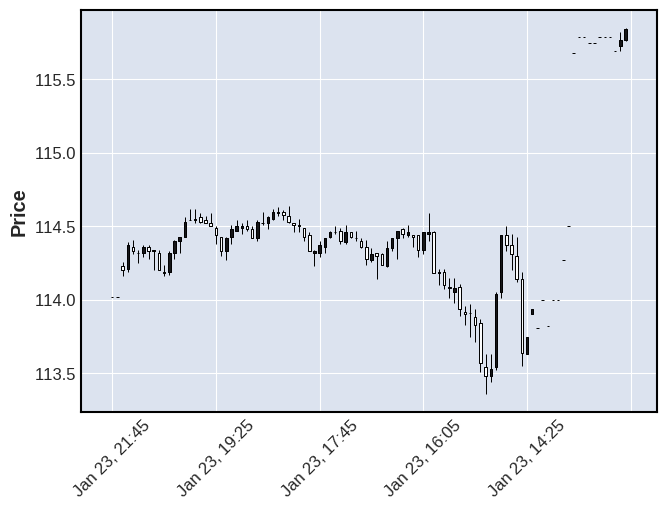

In [12]:
import mplfinance as mpf

plot_df = df_single_stock.iloc[:100]
plot_df = plot_df.set_index('ts')
plot_df = plot_df.rename(columns={'open_price':'Open','close_price':'Close','high_price':'High','low_price':'Low'})

mpf.plot(plot_df, type='candle')